#Data loading and Preparation

##Data Loading

In [3]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
#Loading data
path = '/content/4A_TB_cleaned_classification.xlsx'
data =pd.read_excel(path)
data.head(2)

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,...,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,Survival_Week 1,Survival_Week 2,Survival_Week 3,Survival_Week 4,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,Tuesday,2010,6,0,0,0,0,CENTRAL,"ISS,,",1
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,...,Tuesday,2010,6,0,0,0,0,CENTRAL,"ISS,,",1


#**Data Preprocessing**

In [5]:
col_to_remove = ['DURATION', 'OUT COME', 'IP NUMBER','DISTRICT OF RESIDENCE','UNIT',
                 'ADDITIONAL WORKING DIAGNOSIS','WORKING DIAGNOSIS', 'MARITAL STATUS']
data = data.drop(columns=col_to_remove)

In [6]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(data, columns=['YEAR OF ADMISSION'])

# The resulting DataFrame will have one-hot encoded columns
df_encoded.head()

,SEX,AGE,RELIGION,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MONTH OF ADMISSION,DAY OF ADMISSION,Survival_Week 1,Survival_Week 2,Survival_Week 3,...,YEAR OF ADMISSION_2010,YEAR OF ADMISSION_2011,YEAR OF ADMISSION_2012,YEAR OF ADMISSION_2013,YEAR OF ADMISSION_2014,YEAR OF ADMISSION_2015,YEAR OF ADMISSION_2016,YEAR OF ADMISSION_2017,YEAR OF ADMISSION_2018,YEAR OF ADMISSION_2019
0,M,30,COU,5,Abdominal_TB,November,Tuesday,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,M,30,COU,5,Abdominal_TB,November,Tuesday,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,F,46,COU,3,Disseminated TB,December,Monday,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,F,46,COU,3,Disseminated TB,December,Monday,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,M,80,ISLAM,7,Abdominal_TB,December,Wednesday,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
#Encoding categorical features
non_features = ['NUMBER OF ADDITIONAL WORKING DIAGNOSIS','AGE','NUMBER OF PREVIOUS ADMISSIONS',
                'Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']
data2 = df_encoded.drop(columns=non_features)

text_columns = data2.select_dtypes(include=['object']).columns

data_enc = pd.get_dummies(df_encoded, columns=text_columns)

In [8]:
data_enc.sample(4)

,AGE,NUMBER OF PREVIOUS ADMISSIONS,Survival_Week 1,Survival_Week 2,Survival_Week 3,Survival_Week 4,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,YEAR OF ADMISSION_2010,YEAR OF ADMISSION_2011,YEAR OF ADMISSION_2012,...,DAY OF ADMISSION_Saturday,DAY OF ADMISSION_Sunday,DAY OF ADMISSION_Thursday,DAY OF ADMISSION_Tuesday,DAY OF ADMISSION_Wednesday,REGION_CENTRAL,REGION_EASTERN,REGION_NORTHERN,REGION_UNKNOWN,REGION_WESTERN
17149,24,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12002,38,1,1,1,1,1,3,0,0,0,...,0,0,1,0,0,1,0,0,0,0
14006,48,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
42625,35,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43788 entries, 0 to 43787
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   AGE                                     43788 non-null  int64
 1   NUMBER OF PREVIOUS ADMISSIONS           43788 non-null  int64
 2   Survival_Week 1                         43788 non-null  int64
 3   Survival_Week 2                         43788 non-null  int64
 4   Survival_Week 3                         43788 non-null  int64
 5   Survival_Week 4                         43788 non-null  int64
 6   NUMBER OF ADDITIONAL WORKING DIAGNOSIS  43788 non-null  int64
 7   YEAR OF ADMISSION_2010                  43788 non-null  uint8
 8   YEAR OF ADMISSION_2011                  43788 non-null  uint8
 9   YEAR OF ADMISSION_2012                  43788 non-null  uint8
 10  YEAR OF ADMISSION_2013                  43788 non-null  uint8
 11  YEAR OF ADMISSI

##Normalization and Visualization

In [10]:
#Transforming the continuous features
transform_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
for col in transform_features:
  data_enc[col] = np.log1p(data_enc[col])

#Second transformation
data_enc['NUMBER OF PREVIOUS ADMISSIONS'] = np.log1p(data_enc['NUMBER OF PREVIOUS ADMISSIONS'])


In [11]:
#Normalizing and Standardizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
scaler = MinMaxScaler()
data_enc[normalise_features] = scaler.fit_transform(data_enc[normalise_features])


In [12]:
data_enc.sample(5)

,AGE,NUMBER OF PREVIOUS ADMISSIONS,Survival_Week 1,Survival_Week 2,Survival_Week 3,Survival_Week 4,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,YEAR OF ADMISSION_2010,YEAR OF ADMISSION_2011,YEAR OF ADMISSION_2012,...,DAY OF ADMISSION_Saturday,DAY OF ADMISSION_Sunday,DAY OF ADMISSION_Thursday,DAY OF ADMISSION_Tuesday,DAY OF ADMISSION_Wednesday,REGION_CENTRAL,REGION_EASTERN,REGION_NORTHERN,REGION_UNKNOWN,REGION_WESTERN
43083,0.100305,0.000000,1,1,1,1,0.613147,0,0,0,...,0,0,0,1,0,1,0,0,0,0
37971,0.760372,0.000000,0,0,0,0,0.386853,0,0,0,...,0,0,0,1,0,1,0,0,0,0
21982,0.410678,0.508425,0,0,0,0,0.386853,0,0,1,...,0,0,1,0,0,1,0,0,0,0
18364,0.410678,0.000000,1,1,1,1,0.386853,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41705,0.410678,0.000000,0,1,1,1,0.613147,0,0,0,...,0,0,0,1,0,1,0,0,0,0


#Model training

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l1
tf.random.set_seed(42)

In [14]:
#extracting features and targets
targets = ['Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']
X = data_enc.drop(columns=targets).values
y = data_enc[['Survival_Week 1',	'Survival_Week 2',	'Survival_Week 3',	'Survival_Week 4']].values


#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# neural network model for logistic regression
def logistic_regression_model(input_dim):
    inputs = keras.Input(shape=(input_dim,))
    outputs = keras.layers.Dense(1, activation='sigmoid')(inputs)
    model = keras.Model(inputs, outputs)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

accuracy_scores = [] # list to store accuracy for each week
auc_scores = []  # list to store AUC for each week
training_losses = []
validation_losses = []

# Initializing models for each week using a loop
num_weeks = 4
models = [logistic_regression_model(input_dim=X.shape[1]) for _ in range(num_weeks)]


num_epochs = 200
batch_size = 32

for week in range(num_weeks):
    model = models[week]
    history = model.fit(X_train, y_train[:, week], epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test[:, week]))

    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test[:, week], y_pred_binary)
    print(f'Accuracy for Week {week}: {accuracy}')

    auc = roc_auc_score(y_test[:, week], y_pred)  # Calculate AUC
    print(f'AUC for Week {week}: {auc}')

    # Store the accuracy and AUC in their respective lists
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

    # Extracting training and validation loss
    training_losses.append(history.history['loss'])
    validation_losses.append(history.history['val_loss'])


Epoch 1/200
1095/1095 [==============================] - 3s 2ms/step - loss: 0.6074 - accuracy: 0.7082 - val_loss: 0.5938 - val_accuracy: 0.7150
Epoch 2/200
1095/1095 [==============================] - 2s 2ms/step - loss: 0.5921 - accuracy: 0.7110 - val_loss: 0.5870 - val_accuracy: 0.7150
Epoch 3/200
1095/1095 [==============================] - 3s 3ms/step - loss: 0.5873 - accuracy: 0.7110 - val_loss: 0.5839 - val_accuracy: 0.7150
Epoch 4/200
1095/1095 [==============================] - 2s 2ms/step - loss: 0.5846 - accuracy: 0.7107 - val_loss: 0.5817 - val_accuracy: 0.7144
Epoch 5/200
1095/1095 [==============================] - 2s 2ms/step - loss: 0.5826 - accuracy: 0.7106 - val_loss: 0.5803 - val_accuracy: 0.7143
Epoch 6/200
1095/1095 [==============================] - 2s 2ms/step - loss: 0.5811 - accuracy: 0.7107 - val_loss: 0.5787 - val_accuracy: 0.7144
Epoch 7/200
1095/1095 [==============================] - 2s 2ms/step - loss: 0.5801 - accuracy: 0.7104 - val_loss: 0.5776 - val_ac

In [16]:
# printing accuracy
for week, accuracy in enumerate(accuracy_scores):
  print(f"Week {week + 1} Accuracy: {accuracy}")


Week 1 Accuracy: 0.7183146837177438
Week 2 Accuracy: 0.6371317652432062
Week 3 Accuracy: 0.6104133363781685
Week 4 Accuracy: 0.6083580726193195


In [17]:
# Separate loop to print AUC scores
for week, auc in enumerate(auc_scores):
    print(f'AUC for Week {week}: {auc}')

AUC for Week 0: 0.6377643066338272
AUC for Week 1: 0.6329918873008434
AUC for Week 2: 0.6389869191677249
AUC for Week 3: 0.6409726100458888


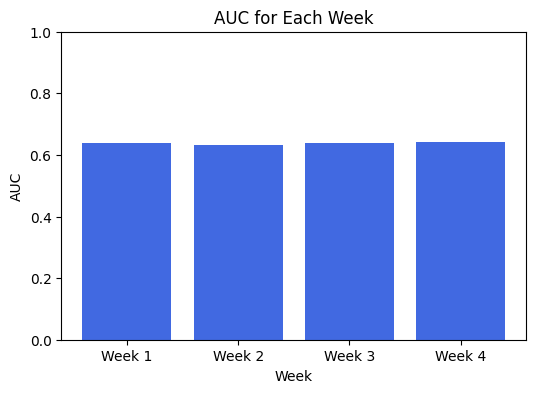

In [18]:
# Create a bar plot to visualize AUC for each week
plt.figure(figsize=(6, 4))
plt.bar(range(num_weeks), auc_scores, color='royalblue')
plt.xlabel('Week')
plt.ylabel('AUC')
plt.title('AUC for Each Week')
plt.xticks(range(num_weeks), [f'Week {week + 1}' for week in range(num_weeks)])
plt.ylim(0, 1.0)  # Set the y-axis limit between 0 and 1
plt.show()

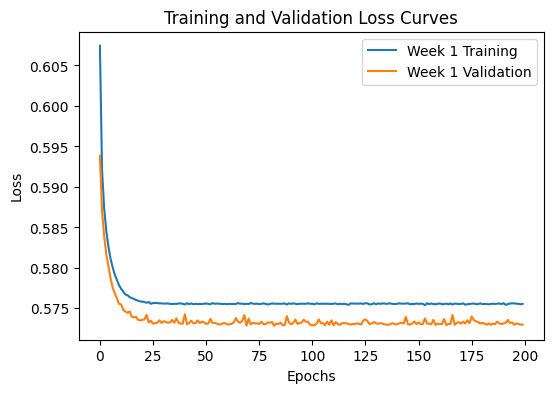

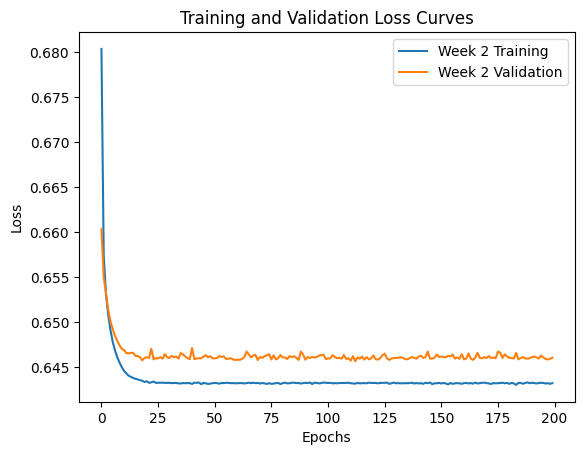

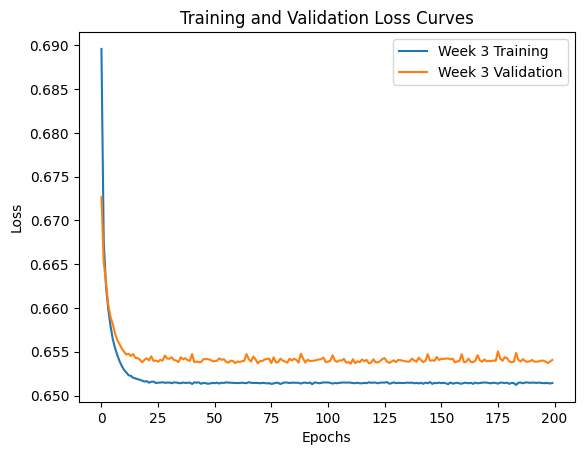

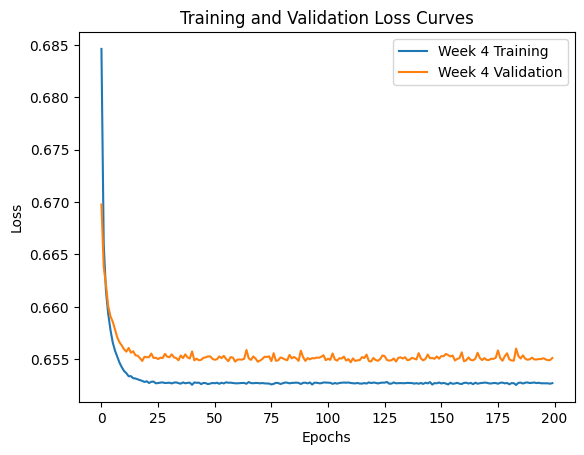

In [19]:
# Plot training and validation loss curves
plt.figure(figsize=(6, 4))
for week in range(num_weeks):
    plt.plot(training_losses[week], label=f'Week {week + 1} Training')
    plt.plot(validation_losses[week], label=f'Week {week + 1} Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()